In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import findspark

findspark.init()

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import asc, desc

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
jdbc_driver_path = 'C:\spark\jars\postgresql-42.7.3'

spark = SparkSession.builder \
    .appName("PostgreSQL_PySpark") \
    .config("spark.driver.extraClassPath", jdbc_driver_path) \
    .getOrCreate()


In [5]:
jdbc_connection_string = 'jdbc:postgresql://localhost:5432/IndicesDB'

db_config = {
    "user": "airflow",
    "password": "password",
    "driver": "org.postgresql.Driver"
}

In [6]:
df = spark.read.jdbc(url=jdbc_connection_string, table="sensex", properties=db_config)

In [7]:
from pyspark.sql.functions import col
df = df.withColumn("open", col("open").cast("double"))
df = df.withColumn("high", col("high").cast("double"))
df = df.withColumn("low", col("low").cast("double"))
df = df.withColumn("close", col("close").cast("double"))
df = df.withColumn("adj_close", col("adj_close").cast("double"))
df = df.withColumn("volume", col("volume").cast("long"))

In [8]:
df.columns

['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume', 'returns']

In [9]:
df.show()

+-------------------+----------------+----------------+----------------+----------------+----------------+------+--------------------+
|               date|            open|            high|             low|           close|       adj_close|volume|             returns|
+-------------------+----------------+----------------+----------------+----------------+----------------+------+--------------------+
|1997-07-02 00:00:00| 4302.9599609375|4395.31005859375|4295.39990234375|4333.89990234375|4333.89990234375|     0|0.007682193820026...|
|1997-07-03 00:00:00| 4335.7900390625| 4393.2900390625|4299.97021484375| 4323.4599609375| 4323.4599609375|     0|-0.00240890229158...|
|1997-07-04 00:00:00| 4332.7001953125|   4347.58984375|  4300.580078125|4323.81982421875|4323.81982421875|     0|8.323502114082615E-5|
|1997-07-07 00:00:00|4326.81005859375|  4391.009765625|  4289.490234375| 4291.4501953125| 4291.4501953125|     0|-0.00748635008446...|
|1997-07-08 00:00:00|4285.64990234375|          4313.0|

In [10]:
from pyspark.sql.functions import to_date
df = df.withColumn("date", to_date(col("date")))

In [11]:
df.head(5)

[Row(date=datetime.date(1997, 7, 2), open=4302.9599609375, high=4395.31005859375, low=4295.39990234375, close=4333.89990234375, adj_close=4333.89990234375, volume=0, returns=0.0076821938200266615),
 Row(date=datetime.date(1997, 7, 3), open=4335.7900390625, high=4393.2900390625, low=4299.97021484375, close=4323.4599609375, adj_close=4323.4599609375, volume=0, returns=-0.0024089022915836367),
 Row(date=datetime.date(1997, 7, 4), open=4332.7001953125, high=4347.58984375, low=4300.580078125, close=4323.81982421875, adj_close=4323.81982421875, volume=0, returns=8.323502114082615e-05),
 Row(date=datetime.date(1997, 7, 7), open=4326.81005859375, high=4391.009765625, low=4289.490234375, close=4291.4501953125, adj_close=4291.4501953125, volume=0, returns=-0.0074863500844646325),
 Row(date=datetime.date(1997, 7, 8), open=4285.64990234375, high=4313.0, low=4252.490234375, close=4306.39013671875, adj_close=4306.39013671875, volume=0, returns=0.0034813269935112245)]

In [12]:
df.take(5)

[Row(date=datetime.date(1997, 7, 2), open=4302.9599609375, high=4395.31005859375, low=4295.39990234375, close=4333.89990234375, adj_close=4333.89990234375, volume=0, returns=0.0076821938200266615),
 Row(date=datetime.date(1997, 7, 3), open=4335.7900390625, high=4393.2900390625, low=4299.97021484375, close=4323.4599609375, adj_close=4323.4599609375, volume=0, returns=-0.0024089022915836367),
 Row(date=datetime.date(1997, 7, 4), open=4332.7001953125, high=4347.58984375, low=4300.580078125, close=4323.81982421875, adj_close=4323.81982421875, volume=0, returns=8.323502114082615e-05),
 Row(date=datetime.date(1997, 7, 7), open=4326.81005859375, high=4391.009765625, low=4289.490234375, close=4291.4501953125, adj_close=4291.4501953125, volume=0, returns=-0.0074863500844646325),
 Row(date=datetime.date(1997, 7, 8), open=4285.64990234375, high=4313.0, low=4252.490234375, close=4306.39013671875, adj_close=4306.39013671875, volume=0, returns=0.0034813269935112245)]

### Data Summary & descriptive statistics

In [13]:
df.printSchema()

root
 |-- date: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- adj_close: double (nullable = true)
 |-- volume: long (nullable = true)
 |-- returns: double (nullable = true)



In [14]:
df.summary().show()

+-------+-----------------+------------------+------------------+------------------+------------------+-----------------+--------------------+
|summary|             open|              high|               low|             close|         adj_close|           volume|             returns|
+-------+-----------------+------------------+------------------+------------------+------------------+-----------------+--------------------+
|  count|             6679|              6679|              6679|              6679|              6679|             6679|                6679|
|   mean|22425.60754564505| 22551.44163200423|22260.963179762948|22405.574208259153|22405.574208259153|60703.15915556221| 5.40577405769198E-4|
| stddev|18915.58620683027|18989.372625220476|18814.316258721177|18905.056045615136|18905.056045615136|916402.6514187439| 0.01444893829002538|
|    min|2621.889892578125| 2682.590087890625|   2594.8701171875|   2600.1201171875|   2600.1201171875|                0| -0.1315258002691394|

In [15]:
df.describe().show()

+-------+-----------------+------------------+------------------+------------------+------------------+-----------------+-------------------+
|summary|             open|              high|               low|             close|         adj_close|           volume|            returns|
+-------+-----------------+------------------+------------------+------------------+------------------+-----------------+-------------------+
|  count|             6679|              6679|              6679|              6679|              6679|             6679|               6679|
|   mean|22425.60754564505| 22551.44163200423|22260.963179762948|22405.574208259153|22405.574208259153|60703.15915556221|5.40577405769198E-4|
| stddev|18915.58620683027|18989.372625220476|18814.316258721177|18905.056045615136|18905.056045615136|916402.6514187439|0.01444893829002538|
|    min|2621.889892578125| 2682.590087890625|   2594.8701171875|   2600.1201171875|   2600.1201171875|                0|-0.1315258002691394|
|    m

In [16]:
df.orderBy(df["high"], ascending=False).select(df["date"], df["high"]).limit(10).show()

+----------+-------------+
|      date|         high|
+----------+-------------+
|2024-08-01|82129.4921875|
|2024-07-29|81908.4296875|
|2024-07-31|81828.0390625|
|2024-07-30|81815.2734375|
|2024-07-19|81587.7578125|
|2024-07-18| 81522.546875|
|2024-07-26|81427.1796875|
|2024-08-02|81345.6015625|
|2024-07-16| 80898.296875|
|2024-07-12|80893.5078125|
+----------+-------------+



In [17]:
from pyspark.sql.functions import mean
df.select(mean(df['adj_close'])).show()

+------------------+
|    avg(adj_close)|
+------------------+
|22405.574208259153|
+------------------+



In [18]:
from pyspark.sql.functions import min, max
df.select(min('volume'), max('volume')).show()

+-----------+-----------+
|min(volume)|max(volume)|
+-----------+-----------+
|          0|   31815100|
+-----------+-----------+



In [19]:
df.filter(df.volume > 0).select(min('volume'), max('volume')).show()

+-----------+-----------+
|min(volume)|max(volume)|
+-----------+-----------+
|        100|   31815100|
+-----------+-----------+



In [20]:
df.filter(df.volume > 0).orderBy(df["volume"], ascending=False).select(df["date"], df["volume"]).limit(5).show()

+----------+--------+
|      date|  volume|
+----------+--------+
|2019-02-01|31815100|
|2018-12-18|20793100|
|2018-12-20|19766300|
|2019-01-30|18974200|
|2019-01-31|18611400|
+----------+--------+



In [21]:
df.filter(df.volume > 100).orderBy(df["volume"], ascending=True).select(df["date"], df["volume"]).limit(5).show()

+----------+------+
|      date|volume|
+----------+------+
|2024-01-02|   300|
|2009-05-18|   800|
|2005-11-10|  1200|
|2023-06-19|  1400|
|2021-11-04|  1800|
+----------+------+



### Correlation Analysis

In [22]:
from pyspark.sql.functions import corr

df.filter(df.volume > 100).select(corr(df['volume'], df['returns'])).show()

+---------------------+
|corr(volume, returns)|
+---------------------+
| 0.004638391763829...|
+---------------------+



In [23]:
df.filter(df.volume > 100).select(corr(df['low'], df['adj_close'])).show()

+--------------------+
|corr(low, adj_close)|
+--------------------+
|  0.9999451306203928|
+--------------------+



In [24]:
df.filter(df.volume > 100).select(corr(df['high'], df['adj_close'])).show()

+---------------------+
|corr(high, adj_close)|
+---------------------+
|   0.9999406433916251|
+---------------------+



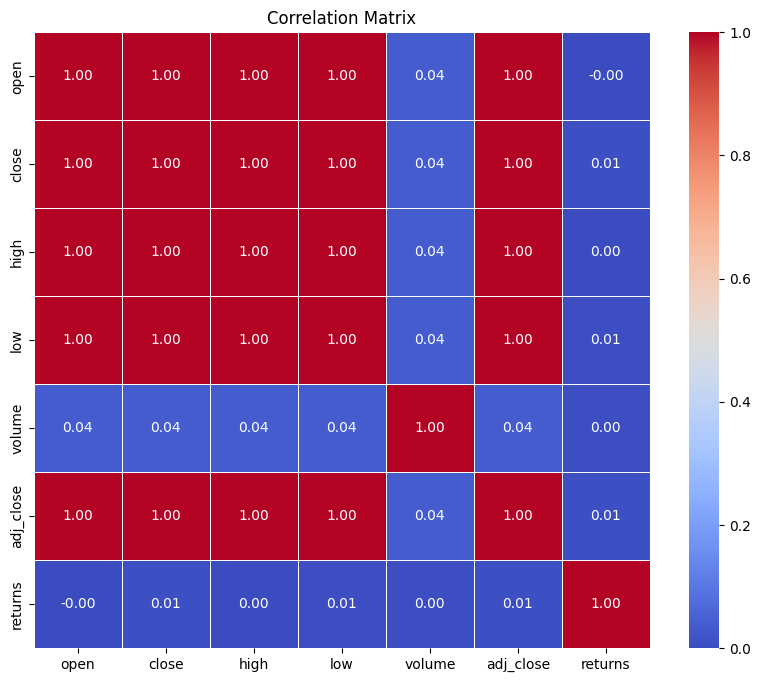

In [25]:
from pyspark.sql.functions import corr

numerical_columns = ["open", "close", "high", "low", "volume", "adj_close", "returns"]

corr_matrix = []
for col1 in numerical_columns:
    row = []
    for col2 in numerical_columns:
        corr_value = df.select(corr(col1, col2).alias("correlation")).collect()[0]["correlation"]
        row.append(corr_value)
    corr_matrix.append(row)

correlation_df = pd.DataFrame(corr_matrix, columns=numerical_columns, index=numerical_columns)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### Time Series Analysis

In [26]:
from pyspark.sql.functions import year, month, dayofweek

df = df.withColumn("year", year(col("date")))
df = df.withColumn("month", month(col("date")))
df = df.withColumn("dayofweek", dayofweek(col("date")))

In [27]:
# Monthly average returns
monthly_avg_returns = df.groupBy("year", "month").agg({"returns": "mean"}).orderBy('avg(returns)')
monthly_avg_returns.show()

+----+-----+--------------------+
|year|month|        avg(returns)|
+----+-----+--------------------+
|2008|   10|-0.01292445203984...|
|2020|    3|-0.01113126308441...|
|2008|    6|-0.00922691003533...|
|2004|    5|-0.00747017383094...|
|2001|    3|-0.00739827296976...|
|2001|    9|-0.00678332381872...|
|1998|    1|-0.00619299293060...|
|2008|    3|-0.00597267464193...|
|2008|    1|-0.00589865065261...|
|1999|    4|-0.00584683623787...|
|1997|    8|-0.00565026153988...|
|2008|    9|-0.00560962078727685|
|2006|    5|-0.00560040286096...|
|2011|    1|-0.00554632995108...|
|1998|    6|-0.00524908378829...|
|1998|   10|-0.00511135638852...|
|2000|   10|-0.00472659088814...|
|2000|    7|-0.00471347053648...|
|2011|   11|-0.00458943558618975|
|1998|    5|-0.00445821499449...|
+----+-----+--------------------+
only showing top 20 rows



In [28]:
# Yearly average returns
yearly_avg_returns = df.groupBy("year").agg({"returns": "mean"}).orderBy('avg(returns)')
yearly_avg_returns.show()

+----+--------------------+
|year|        avg(returns)|
+----+--------------------+
|2008|-0.00263347805947...|
|1997|-0.00121656970241...|
|2011|-0.00106205019412...|
|2000|-6.88131365702593...|
|2001|-6.49710710713711...|
|1998|-5.64723183414203...|
|2015|-1.57747444539536...|
|2016|1.226748602521368E-4|
|2002|1.991885508502200...|
|2022|2.357891922358729...|
|2018|2.646536714227714...|
|2013|4.085741369378205...|
|2019|5.954334675024685E-4|
|2004|6.205911938798892E-4|
|2024|6.463521399111322E-4|
|2010|6.936354591001433E-4|
|2023|7.205848135572831E-4|
|2020|7.948546075878536E-4|
|2021| 8.54959986319891E-4|
|2012| 9.81827185335687E-4|
+----+--------------------+
only showing top 20 rows



In [29]:
month_df = df.withColumn('month', month(df['date']))
month_df.groupBy('month').avg()['month', 'avg(adj_close)'].sort(desc("avg(adj_close)")).show()

+-----+------------------+
|month|    avg(adj_close)|
+-----+------------------+
|    7|  22911.6900932983|
|    1|  22868.0841418567|
|    6|22851.032699558426|
|    2| 22816.90751622087|
|    5|22674.544507264254|
|    4|22494.842810558297|
|   12| 22450.05572317023|
|    8|22252.795068359374|
|   11| 22192.30075067538|
|    3| 22135.84767359332|
|   10| 21681.94965079661|
|    9|21455.713229709203|
+-----+------------------+



In [30]:
year_df = df.withColumn('year', year(df['date']))
year_df = year_df.groupBy('year').max()['year', 'max(close)'].sort(desc('max(close)')).show()

+----+----------------+
|year|      max(close)|
+----+----------------+
|2024|    81867.546875|
|2023|   72410.3828125|
|2022|  63284.19140625|
|2021|  61765.58984375|
|2020|    47751.328125|
|2019|   41681.5390625|
|2018|  38896.62890625|
|2017|    34056.828125|
|2015|  29681.76953125|
|2016| 29045.279296875|
|2014| 28693.990234375|
|2013| 21326.419921875|
|2010|  20932.48046875|
|2008| 20873.330078125|
|2011|  20561.05078125|
|2007| 20375.869140625|
|2012|  19486.80078125|
|2009| 17464.810546875|
|2006|13972.0302734375|
|2005|    9397.9296875|
+----+----------------+
only showing top 20 rows



In [31]:
monthly_trends = df.groupBy("year", "month").agg({"adj_close": "mean"}).orderBy("year", "month")
monthly_trends.show()

+----+-----+------------------+
|year|month|    avg(adj_close)|
+----+-----+------------------+
|1997|    7|  4254.06953568892|
|1997|    8| 4276.311659071181|
|1997|    9| 3944.780018199574|
|1997|   10|3991.7494731702304|
|1997|   11| 3611.828503417969|
|1997|   12|3515.5086558948865|
|1998|    1|3472.8700317382813|
|1998|    2|3402.7010176809213|
|1998|    3| 3825.430517578125|
|1998|    4| 4109.353682668586|
|1998|    5|3911.9511040581597|
|1998|    6|3317.4940851384945|
|1998|    7|3271.7265306555705|
|1998|    8|2988.4025268554688|
|1998|    9|3089.8818137428975|
|1998|   10| 2866.460544162326|
|1998|   11|2912.3875122070312|
|1998|   12|2945.9872824928975|
|1999|    1| 3287.092230902778|
|1999|    2|    3283.721484375|
+----+-----+------------------+
only showing top 20 rows



In [32]:
from pyspark.sql.window import Window
from pyspark.sql.functions import stddev, avg

# Define a window for rolling calculations
window_spec = Window.orderBy("date").rowsBetween(-7, 0)

# Alternatively, calculate monthly volatility
monthly_volatility = df.groupBy("year", "month").agg(stddev(col("returns")).alias("monthly_volatility"))
monthly_volatility.orderBy("year", "month").show()

+----+-----+--------------------+
|year|month|  monthly_volatility|
+----+-----+--------------------+
|1997|    7|0.010908905140777147|
|1997|    8|0.019119476179207177|
|1997|    9|  0.0109856826828557|
|1997|   10|0.013420989956764303|
|1997|   11|0.016058984696302344|
|1997|   12| 0.01315871314182906|
|1998|    1|0.015151638898106553|
|1998|    2|0.014543298068342718|
|1998|    3|0.015149344187052735|
|1998|    4|0.016856139923054996|
|1998|    5|0.018487276334989665|
|1998|    6|0.030865173774259475|
|1998|    7|0.020723826428532943|
|1998|    8|0.016127315475507144|
|1998|    9|0.014605056217745046|
|1998|   10|0.025882652988559837|
|1998|   11|0.013150823083087513|
|1998|   12|0.015165197940616567|
|1999|    1|0.019389852031202876|
|1999|    2|0.011345814050795069|
+----+-----+--------------------+
only showing top 20 rows



### Distribution Analysis

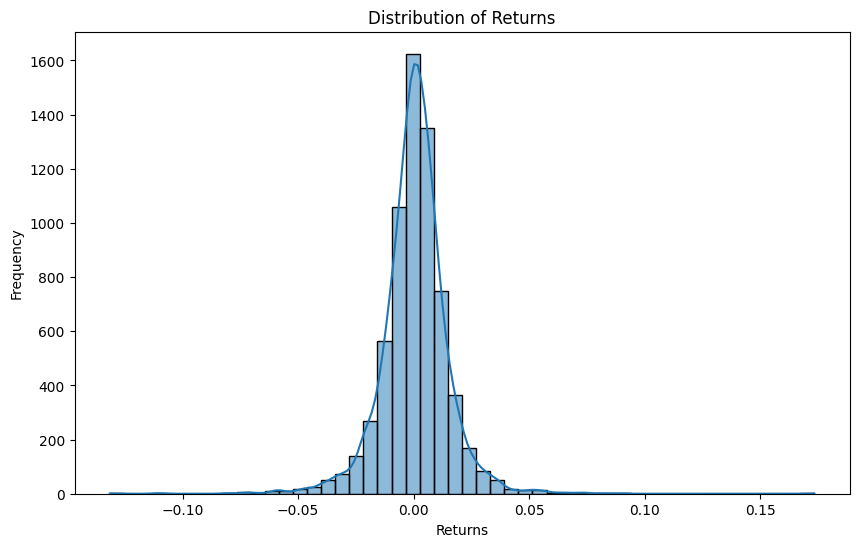

In [33]:
from pyspark.sql.functions import col

returns_df = df.select("returns").toPandas()

plt.figure(figsize=(10, 6))
sns.histplot(returns_df["returns"], bins=50, kde=True)
plt.title("Distribution of Returns")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()

In [34]:
from scipy.stats import skew, kurtosis

returns_data = df.select("returns").toPandas()

skewness = skew(returns_data["returns"])
kurt = kurtosis(returns_data["returns"])

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

Skewness: -0.05869486258511967
Kurtosis: 8.701617066025426


In [35]:
spark.stop()